## Final Project Submission

Please fill out:
* Student name: Stacy Waweru
* Student pace: Full Time Hybrid
* Scheduled project review date/time: 
* Instructor name: Antonny Muiko
* Blog post URL:


### Business Overview

My company now sees all the big companies creating original video content and want to get in on the fun. We have decided to create a new movie studio, but don’t know anything about creating movies. 
I will explore the types of films that are doing the best at the box office. I will base my research on the genre, movie rating,directors and the budget as well as the highest gross film
I will then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

### Purpose of Research

1. To determine the highest gross films.
2. To determine the budget required for sucessful films.
3. To determine the correlation between movie budget and the gross revenue.
5. To determine the release years and months with the highest gross film.


### Data Analysis

#### The Data

In the folder `zippedData` are movie datasets from:

* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

Because it was collected from various locations, the different files have different formats. Some are compressed CSV (comma-separated values) or TSV (tab-separated values) files that can be opened using spreadsheet software or `pd.read_csv`, while the data from IMDB is located in a SQLite database.

![movie data erd](https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-2-project-v3/main/movie_data_erd.jpeg)

The above diagram shows ONLY the IMDB data. The IMDB data relates to the other provided data files.



#### Data Understanding

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import os
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [2]:
# declare the database file path
file_path = r"C:\Users\stacy\Documents\Flatiron\Project\Phase_2_Project\zippedData\im.db\im"

#Establish a connection to the database using sqlite3

conn = sqlite3.connect(file_path)

In [3]:
#read the sql data

pd.read_sql("""
SELECT *
FROM sqlite_master 

""",conn)


,type,name,tbl_name,rootpage,sql


It appears that the IMDB database does not cotain any data. I will need to confirm this. From the image, the database should contain a movie_basics table. I will attempt to fetch data from the table. 

In [4]:
# Tool that interacts with the elements in the database

cursor = conn.cursor()

In [5]:
# Read data from the movie_basics table

movie_basics_query =\
"""
SELECT *
FROM movie_basics
"""

In [6]:
cursor.execute(movie_basics_query)

OperationalError: no such table: movie_basics

In [7]:
cursor.fetchall()

[]

From the Operational Error, the movie_basics table is not present in the data base. This confirms that there is no data in the IMDB database.

Sq will therefore not be used in this project since no data can be collected from the empty database.

I will continue to look into the box office csv file.

In [8]:
#read the movie_gross from box office csv file

movie_gross_path = r"C:\Users\stacy\Documents\Flatiron\Project\Phase_2_Project\zippedData\bom.movie_gross.csv.gz"

movie_gross_df = pd.read_csv(movie_gross_path)
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


I will check the movies listed in TheMovieDB

In [9]:
#read the movies from The Movies DataBase csv file

movie_path = r"C:\Users\stacy\Documents\Flatiron\Project\Phase_2_Project\zippedData\tmdb.movies.csv.gz"

movie_df = pd.read_csv(movie_path)
movie_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


I will also check the movie budget listed in TheNumbers csv files

In [10]:
#read the movie budget from TheNumbers csv file

movie_budget_path = r"C:\Users\stacy\Documents\Flatiron\Project\Phase_2_Project\zippedData\tn.movie_budgets.csv.gz"

movie_budget_df = pd.read_csv(movie_budget_path)
movie_budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


I will look into the data in the Rotten Tomatoes movie information

In [11]:
# read the Rotten Tomatoes movie info tsc file

movies_info_path = r"C:\Users\stacy\Documents\Flatiron\Project\Phase_2_Project\zippedData\rt.movie_info.tsv.gz"

movies_info_df = pd.read_table(movies_info_path)
movies_info_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


I will look into the data in the Rotten tomatoes movie reviews.

In [12]:
# read the Rotten Tomatoes reviews tsv file

reviews_path = r"C:\Users\stacy\Documents\Flatiron\Project\Phase_2_Project\zippedData\rt.reviews.tsv.gz"

reviews_df = pd.read_csv(reviews_path, compression= 'gzip', sep='\t', encoding ='latin1')
reviews_df

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


From my objectives, I will determine movies with the highest gross, the budget required and movies in the highest gross with the highest rating. I will therefore use the movie_gross_df , movie_budget_df and reviews_df moving forward.

#### Data Exploration

#####  movie_gross

In [13]:
#summary of the movie_gross csv data

movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [14]:
#desciption

movie_gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [15]:
# determine the number of rows and columns

movie_gross_df.shape

(3387, 5)

In [16]:
# display the column names

movie_gross_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [17]:
#display the first 10 rows

movie_gross_df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [18]:
#display the last 10 rows

movie_gross_df.tail(10)

,title,studio,domestic_gross,foreign_gross,year
3377,Let Yourself Go,Men.,12200.0,NaN,2018
3378,Hannah (2018),PDF,11700.0,NaN,2018
3379,Souvenir,Strand,11400.0,NaN,2018
3380,Furious (Legend of Kolovrat),CARUSEL,10000.0,NaN,2018
3381,Beauty and the Dogs,Osci.,8900.0,NaN,2018
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


##### movie_budget_df

In [19]:
#summary of the data

movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [20]:
#desciption of the dataframe

movie_budget_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [21]:
# determine the number of rows and columns in the dataframe

movie_budget_df.shape

(5782, 6)

In [22]:
# display the column names in the dataframe

movie_budget_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [23]:
#display the first 5 rows

movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [24]:
#display the last 5 rows

movie_budget_df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


##### reviews_df

In [25]:
#summary of the data

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [26]:
#desciption of the dataframe

reviews_df.describe()

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


In [27]:
# determine the number of rows and columns in the dataframe

reviews_df.shape

(54432, 8)

In [28]:
# display the column names in the dataframe

reviews_df.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [29]:
#display the first 10 rows

reviews_df.head(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


In [30]:
#display the last 10 rows

reviews_df.tail(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
54422,2000,Arguably the best script that Besson has writt...,3.5/5,fresh,Wade Major,0,Boxoffice Magazine,"September 27, 2002"
54423,2000,"Despite the title, Wasabi isn't so spicy.",C,rotten,NaN,0,E! Online,"September 27, 2002"
54424,2000,Dawdles and drags when it should pop; it doesn...,1.5/5,rotten,Manohla Dargis,1,Los Angeles Times,"September 26, 2002"
54425,2000,Despite Besson's high-profile name being Wasab...,NaN,fresh,Andy Klein,0,New Times,"September 26, 2002"
54426,2000,The film lapses too often into sugary sentimen...,NaN,rotten,Paul Malcolm,1,L.A. Weekly,"September 26, 2002"
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


#### Data Cleaning

##### Cleaning the box office movies gross csv

In [31]:
#determine the number of missing values

movie_gross_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [32]:
#Fill in the missing values in Studio with Unknown

movie_gross_df['studio'].fillna('Unknown', inplace=True)

In [33]:
#Confirm that there are no missing values in Studio

movie_gross_df.isnull().sum()

title                0
studio               0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [34]:
# Fill in the missing values in domestic_gross with the mean 

movie_gross_df['domestic_gross'] = movie_gross_df['domestic_gross'].fillna(movie_gross_df['domestic_gross'].mean())

In [35]:
#Confirm that the domestic gross no longer has missing values

movie_gross_df.isnull().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

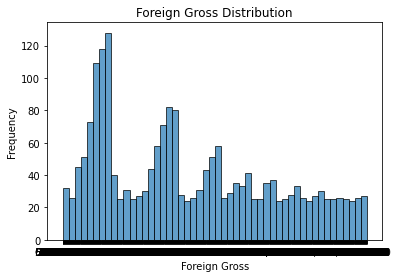

count        2037
unique       1204
top       1200000
freq           23
Name: foreign_gross, dtype: object


In [36]:
# Determine the distribution of the foreign_gross

# Plot the distribution of the foreign_gross
plt.hist(movie_gross_df['foreign_gross'].dropna(), bins=50, edgecolor='k', alpha=0.7)
plt.title('Foreign Gross Distribution')
plt.xlabel('Foreign Gross')
plt.ylabel('Frequency')
plt.show()

# Print summary statistics
print(movie_gross_df['foreign_gross'].describe())


From the histogram distribution, the foreign gross data appears to be right skewed. The median is used to fill in the missing values

In [37]:
# Remove commas and convert to numeric for foreign_gross

movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].str.replace(',', '')

In [38]:
# Change the data type to float

movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].astype(float)

In [39]:
# Fill missing foreign_gross values with the median

movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].fillna(movie_gross_df['foreign_gross'].median())

In [40]:
#Check the data 

movie_gross_df.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [41]:
# displaying last 500

movie_gross_df['foreign_gross'].tail(500)

2887     8600000.0
2888     7400000.0
2889     8100000.0
2890    23200000.0
2891    11200000.0
           ...    
3382    18700000.0
3383    18700000.0
3384    18700000.0
3385    18700000.0
3386    18700000.0
Name: foreign_gross, Length: 500, dtype: float64

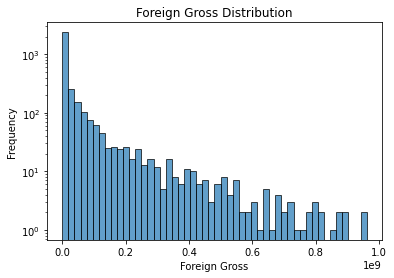

In [42]:
# Plot the distribution of foreign_gross
plt.hist(movie_gross_df['foreign_gross'].dropna(), bins=50, edgecolor='k', alpha=0.7)
plt.title('Foreign Gross Distribution')
plt.xlabel('Foreign Gross')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()


In [43]:
# Print summary statistics
print(movie_gross_df['foreign_gross'].describe())

count    3.387000e+03
mean     5.248329e+07
std      1.100461e+08
min      6.000000e+02
25%      1.160000e+07
50%      1.870000e+07
75%      2.915000e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64


Replacing the missing values in the foreign_gross column with the median does not does nor interfere with the accuracy of the data

In [44]:
# checking for duplicates

movie_gross_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool

In [45]:
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,18700000.0,2018
3383,Edward II (2018 re-release),FM,4800.0,18700000.0,2018
3384,El Pacto,Sony,2500.0,18700000.0,2018
3385,The Swan,Synergetic,2400.0,18700000.0,2018


The dataframe has been cleaned up and is ready for analysis

##### Cleaning the movie budget dataframe

In [46]:
# checking for the missing values

movie_budget_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [47]:
# checking duplicates

movie_budget_df.duplicated().sum()

0

In [48]:
# Remove commas and convert to numeric for foreign_gross


movie_budget_df['production_budget'] = movie_budget_df['production_budget'].str.replace(',', '')
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].str.replace(',', '')
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].str.replace(',', '')

In [49]:
# Removing all dollar signs and commas
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].replace('[\$,]', '', regex= True).astype(float)
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].replace('[\$,]', '', regex= True).astype(float)
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].replace('[\$,]', '', regex= True).astype(float)


movie_budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


The data in the movie budget appears to be perfect. There is no need to clean the data.

##### Cleaning the reviews dataframe 

In [50]:
reviews_df

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [51]:
# checking for the missing values

reviews_df.isnull().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [52]:
# Some of the columns will not be necessary in the analysis. Drop the review, critic and publisher columns.

columns_to_drop = ['review', 'critic', 'publisher']

reviews_df = reviews_df.drop(columns = columns_to_drop)

reviews_df

,id,rating,fresh,top_critic,date
0,3,3/5,fresh,0,"November 10, 2018"
1,3,NaN,rotten,0,"May 23, 2018"
2,3,NaN,fresh,0,"January 4, 2018"
3,3,NaN,fresh,0,"November 16, 2017"
4,3,NaN,fresh,0,"October 12, 2017"
...,...,...,...,...,...
54427,2000,NaN,fresh,1,"September 24, 2002"
54428,2000,1/5,rotten,0,"September 21, 2005"
54429,2000,2/5,rotten,0,"July 17, 2005"
54430,2000,2.5/5,rotten,0,"September 7, 2003"


In [53]:
#Check the data

reviews_df.isnull().sum()

id                0
rating        13517
fresh             0
top_critic        0
date              0
dtype: int64

In [54]:
# Fill in the missing values in the rating column. The rating is related to the fresh column.

# We will assume a rating of 2 if the fresh column is rotten and a rating of 4 if the fresh column is fresh



reviews_df.loc[(reviews_df['rating'].isna()) & (reviews_df['fresh'] == 'rotten'), 'rating'] = '2/5'
reviews_df.loc[(reviews_df ['rating'].isna()) & (reviews_df['fresh'] == 'fresh'), 'rating'] = '4/5'

reviews_df

,id,rating,fresh,top_critic,date
0,3,3/5,fresh,0,"November 10, 2018"
1,3,2/5,rotten,0,"May 23, 2018"
2,3,4/5,fresh,0,"January 4, 2018"
3,3,4/5,fresh,0,"November 16, 2017"
4,3,4/5,fresh,0,"October 12, 2017"
...,...,...,...,...,...
54427,2000,4/5,fresh,1,"September 24, 2002"
54428,2000,1/5,rotten,0,"September 21, 2005"
54429,2000,2/5,rotten,0,"July 17, 2005"
54430,2000,2.5/5,rotten,0,"September 7, 2003"


In [55]:
# Confirm that there are no missing values

reviews_df.isna().sum()

id            0
rating        0
fresh         0
top_critic    0
date          0
dtype: int64

In [56]:
# checking duplicates

reviews_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
54427    False
54428    False
54429    False
54430    False
54431    False
Length: 54432, dtype: bool

#### Data Analysis

From the cleaned dataframes, it appears that the reviews_df does not contain the movies which the movie studio can use as a point of reference about the movies to create. The id does not give enough information for it to be used. It will therefore not be used for further analysis.

The movie_gross_df will also not be used for analysis. The relevant information in the movie_gross is present in the movie_budget_df, hence it will be redundant to use both of them.

Only the movie_budget_df will be used for the analysis.

##### Saving the cleaned data

In [57]:
# Save cleaned DataFrames to csv
movie_gross_df.to_csv('cleaned_movie_gross_df', index=False)
movie_budget_df.to_csv('cleaned_movie_budget_df', index=False)
reviews_df.to_csv('cleaned_movie_ratings_df', index=False)

##### Data Visualization

###### Movies with the highest  worldwide gross

I will select the top 10 movies with the highest worldwide gross.
The worldwide gross is the annual sum of all sources of revenue before deducting the expenses incurred by other affiliated copanies/groups. It is the sum of the domestic gross and internatioal gross.

In [58]:
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


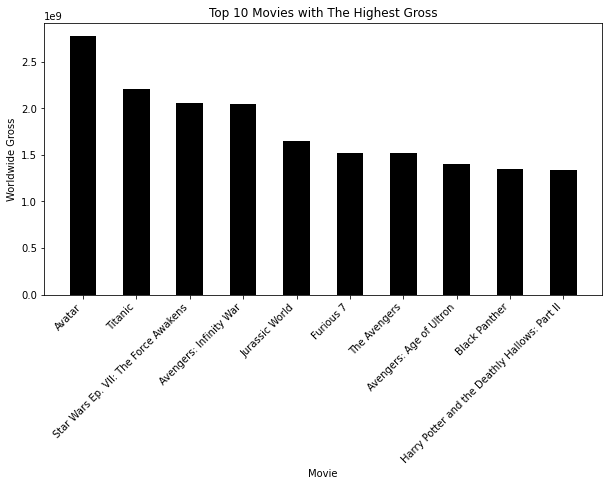

In [59]:
# Selecting the top 10 movies with the highest worldwide gross

top_10_movies = movie_budget_df.nlargest(10, 'worldwide_gross')

#plotting

plt.figure(figsize=(10,5))
plt.bar(top_10_movies['movie'], top_10_movies['worldwide_gross'], color='black', width=0.5)
plt.title('Top 10 Movies with The Highest Gross')
plt.xlabel('Movie')
plt.ylabel('Worldwide Gross')
plt.xticks(rotation=45, ha='right')

# Save the bar graph as an image

plt.savefig('top_10_movies_gross.jpeg', format='jpeg', pil_kwargs={'quality': 95})

plt.show()


Avatar has the highest world wide gross.

###### Budget for the movies with the highest  worldwide gross

I will need to determine the production budget for the top 10 movies with the highest worldwide gross.
This will help the company have an idea of the amount that will go into producing movies that yield high gross returns.

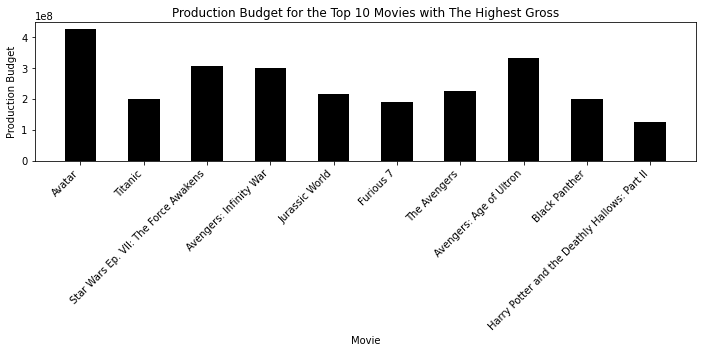

In [60]:
# Selecting the top 10 movies with the highest worldwide gross

top_10_movies = movie_budget_df.nlargest(10, 'worldwide_gross')

#plotting

plt.figure(figsize=(10,5))
plt.bar(top_10_movies['movie'], top_10_movies['production_budget'], color='black', width=0.5)
plt.title('Production Budget for the Top 10 Movies with The Highest Gross')
plt.xlabel('Movie')
plt.ylabel('Production Budget')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the bar graph as an image

plt.savefig('budget_for_top_10_movies_gross.jpeg', format='jpeg', pil_kwargs={'quality': 95})

plt.show()


The average budget for the top movies is between 100,000,000 dollars and 400,000,000 dollars

###### Analyse the budget and gross for the top 10 movies

The analysis aims to determine a correlation between the production budget and the worldwide gross

I will use scatter plots to first determine if there is a correlation between the budget and the gross.

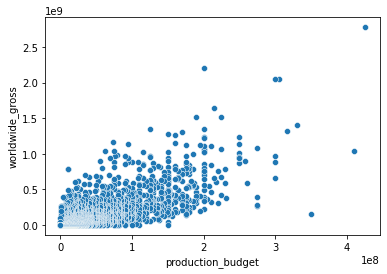

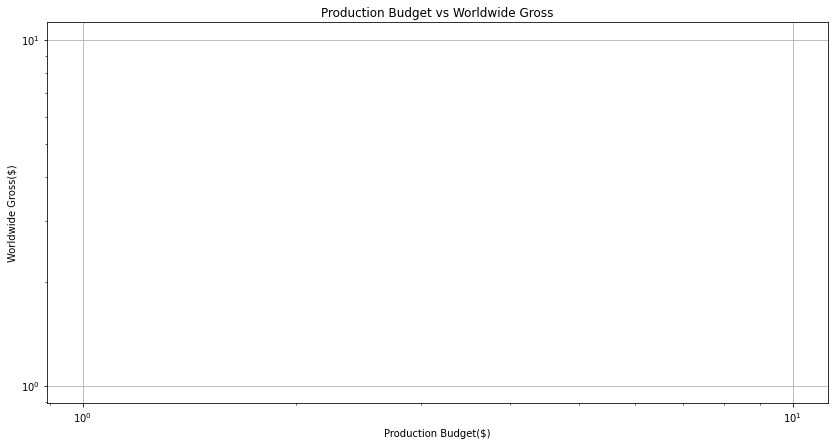

In [61]:
# plot a scatterplot to determine if there is a relationship

top_10_movies = movie_budget_df.nlargest(10, 'worldwide_gross')

sns.scatterplot(x='production_budget', y='worldwide_gross', data= movie_budget_df)
plt.figure(figsize=(14,7))
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget($)')
plt.ylabel('Worldwide Gross($)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)

#save
plt.savefig('budget_gross-scatterplot.jpeg', format='jpeg', pil_kwargs={'quality': 95})


plt.show()


I will need to carry out correlation analysis to quantify the relationship.

In [62]:
correlation = movie_budget_df[['production_budget', 'worldwide_gross']].corr().iloc[0,1]

print(f'The correlation coefficient between production budget and worldwide gross is {correlation: .2f}')

The correlation coefficient between production budget and worldwide gross is  0.75


A linear regression model can help quantify this established relationship

Type of y:<class 'pandas.core.series.Series'>


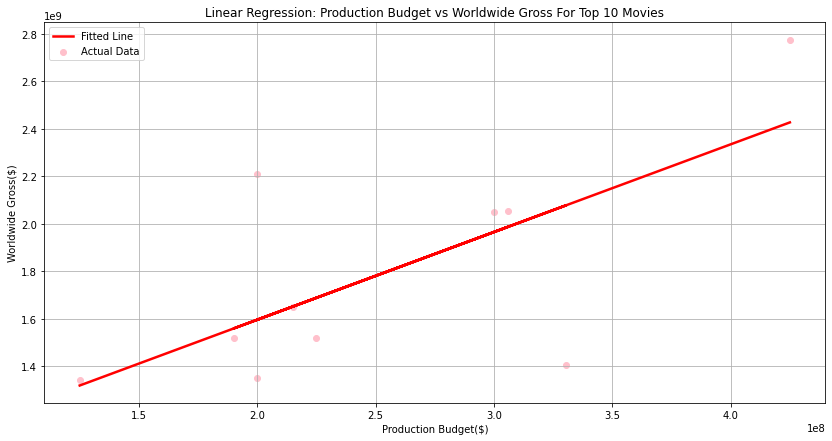

Regression Coefficient: 3.70
Intercept: 856088456.94


In [63]:
top_10_movies = movie_budget_df.nlargest(10, 'worldwide_gross')


#Scatter plot with a linear regression line
plt.figure(figsize=(14,7))
plt.scatter(top_10_movies['production_budget'], top_10_movies['worldwide_gross'], color='pink', label='Actual Data')



#Linear regression model

x = top_10_movies[['production_budget']]
y = top_10_movies[['worldwide_gross']].values
y= top_10_movies[['worldwide_gross']].squeeze() # convert dataframe to series
model = LinearRegression().fit(x,y)
y_pred = model.predict(x)

#confirm y type
print(f"Type of y:{type(y)}")


#Regression Line
plt.plot(top_10_movies['production_budget'], y_pred, color='red', linewidth=2.5, label ='Fitted Line')

plt.title('Linear Regression: Production Budget vs Worldwide Gross For Top 10 Movies')
plt.xlabel('Production Budget($)')
plt.ylabel('Worldwide Gross($)')
plt.legend()
plt.grid(True)

#save
plt.savefig('Budget_Gross_correlation.jpeg', format='jpeg', pil_kwargs={'quality': 95})


plt.show()


print(f'Regression Coefficient: {model.coef_[0]:.2f}')
print(f'Intercept: {model.intercept_:.2f}')



The line indicates a positive relationship. Increasing the budget tends to increase the gross revenue earned.

A regression Coefficient of 3.70 indicates that for each dolar spent in the budget, there is a 3.70 gross revenue return

The intercept of 856088456.94 indicates that other factors other than budget are likely to affect the gross revenue earned by a movie studio.

Let us consider other factors such as the release date

###### Release date for the movies with the highest worldwide gross

In [64]:
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [65]:
#convert release date to datetime
movie_budget_df['release_date'] = pd.to_datetime(movie_budget_df['release_date'], format= '%b %d, %Y', errors='coerce')

movie_budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00


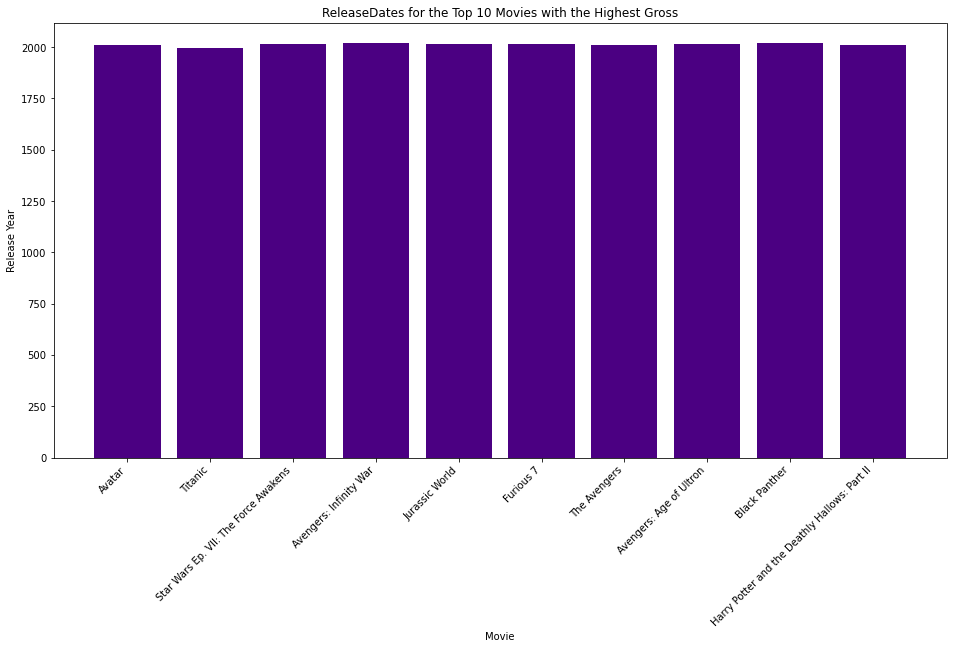

In [66]:
#plot a bar graph to determine release dates of the movies with the highest gross

top_10_movies = movie_budget_df.nlargest(10, 'worldwide_gross')

plt.figure(figsize=(16,8))
plt.bar(top_10_movies['movie'], top_10_movies['release_date'].dt.year, color='indigo')
plt.xlabel('Movie')
plt.ylabel('Release Year')
plt.title('ReleaseDates for the Top 10 Movies with the Highest Gross')
plt.xticks(rotation=45, ha='right')

# Save the plot as an image file
plt.savefig('Release_years of_top_10_movies.jpeg', format='jpeg', pil_kwargs={'quality': 95})


plt.show()



From the code, it is clear that the best performing movies were released close to the 2000s. I will use a line plot to look at the trend

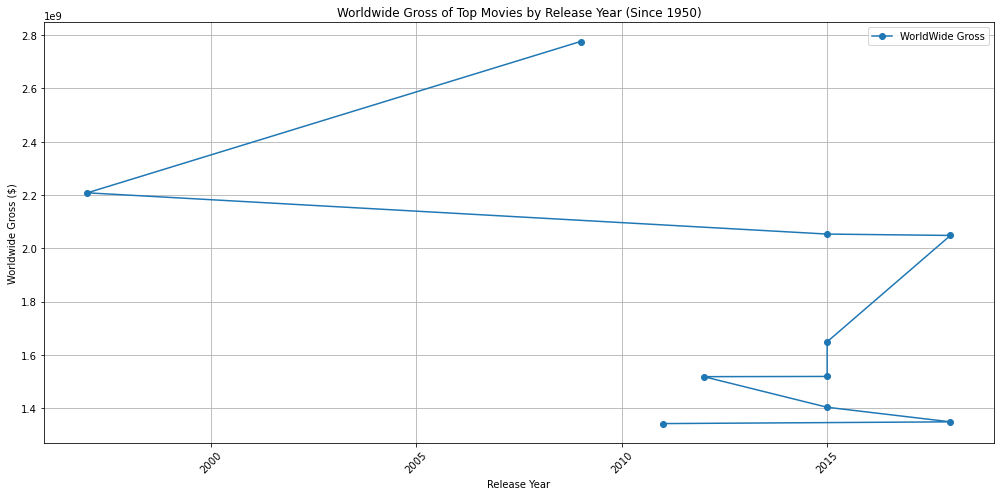

In [67]:
#Line plot

# extract the release year from release date
movie_budget_df['release_year'] = movie_budget_df['release_date'].dt.year

#filter the data for the years between 1950 and 2025

filtered_df = movie_budget_df[(movie_budget_df['release_year'] >=1950)]

# sort movies by worldwide gross
top_10_movies = movie_budget_df.nlargest(10, 'worldwide_gross')

#plotting
plt.figure(figsize=(14,7))
plt.plot(top_10_movies['release_year'], top_10_movies['worldwide_gross'], marker='o', linestyle='-', label= 'WorldWide Gross')
plt.title('Worldwide Gross of Top Movies by Release Year (Since 1950)')
plt.xlabel('Release Year')
plt.ylabel('Worldwide Gross ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


# Save the plot as an image file
plt.savefig('Release_years of_top_10_movies_worldwide_gross.jpeg', format='jpeg', pil_kwargs={'quality': 95})

#show
plt.show()



Peak months when movies are released

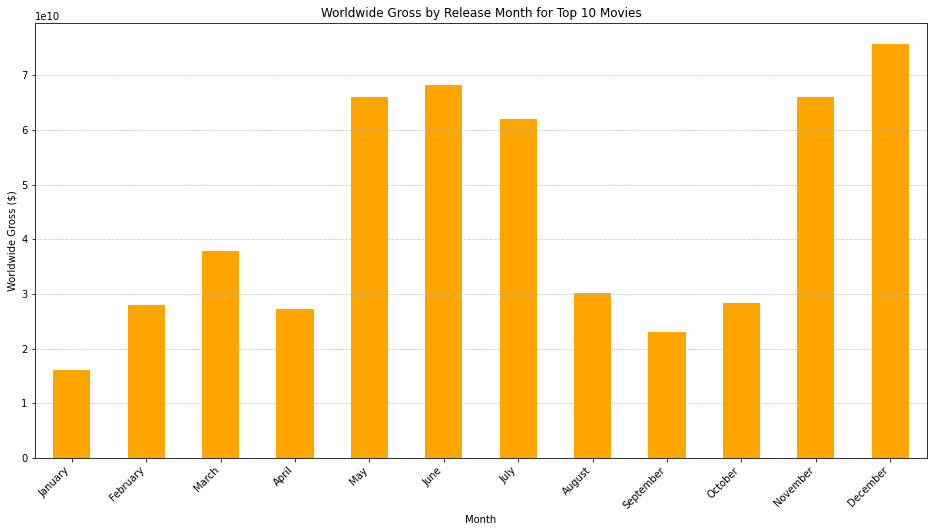

In [68]:
#plot a bar graph to determine release dates of the movies with the highest gross

top_10_movies = movie_budget_df.nlargest(10, 'worldwide_gross')

#Extract month from the release date
movie_budget_df['month'] = movie_budget_df['release_date'].dt.month_name()

monthly_gross = movie_budget_df.groupby('month')['worldwide_gross'].sum()

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_gross = monthly_gross.reindex(months_order)





plt.figure(figsize=(16,8))
monthly_gross.plot(kind='bar', color='orange')
plt.xlabel('Month')
plt.ylabel('Worldwide Gross ($)')
plt.title('Worldwide Gross by Release Month for Top 10 Movies')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Save the plot as an image file
plt.savefig('monthly_worldwide_gross.jpeg', format='jpeg', pil_kwargs={'quality': 95})


plt.show()


Most of the movies with the highest gross revenue were released after 2010. This may be due to improved technology which improved the quality of the movies produced.

An increase in the viewership may be a factor since from 2010, there were more streaming sites, cables and theaters for movies to be watched.

Inflation may also be a factor since the value of money increases with time. The movies in the previous years may be worth more if the inflation rate is considered

Movies bring in the highest gross revenue in December. Other well performing months are May, June and July.

This may be because most places close for the hoolidays in December hence more people have time to watch movies then. Between May and July, people appear to spend their summer watching movies hence generating revenue.

### Conclusion

More factors may need to be considered bfore coming to a final conclusion.

However, from the analysis it is clear that:


    1. Investing in movies with the higher worldwide gross returns will yield more profit for the movie studio.
    2. A high initial capital will increase the odds of success. 
    3. Movies released more recently perform better than movies released in the more distant past. 

In [69]:
print(os.getcwd())

C:\Users\stacy\Documents\Flatiron\phase_2\dsc-phase-2-project-v3
